<h1>EC704 VLSI Design Automation</h1>
<h2>Assignment 1</h2>
<h3>Submitted To:</h3>

<h3>Question</h3>
<p>
Given: An array of rectangles in the file test_data.txt.


The following is the format of the representation of rectangle:

{rectangle_id, left_bottom_corner_x_coordinate, left_bottom_corner_y_coordinate, right_top_corner_x_coordinate, right_top_corner_y_coordinate}. 


Develop python codes in modular fashion to perform the following functions:
Read data corresponding to the rectangular objects from the file test_data.txt. Using matplotlib or any other suitable library plot the given objects in Jupyter IDE.

Read the test data from a file "test_data.txt". Display the rectangle/s graphically in the Jupyter IDE. 



Problems to be solved using Python:

Q1) Accept input {x, y} from the keyboard. Print if this point lies within any of the rectangles in the given test data set. If yes then list the rectangles enclosing the given point in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id}. Eg: {1, 5, 8} implies that given point(x, y) is enclosed in the rectangles 1, 5 and 8.

Q2) List of rectangles that don't overlap any other rectangles. The output should be in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id} 

Q3) List of rectangles that overlap with other rectangles in the format {{rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, ..... {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}}
Eg: {{5, 7, 9, 12}, {6, 10, 12}} implies that rectangle 5 overlaps with rectangles 7, 9 and 12; rectangle 6 overlaps with rectangles 10 and 12.

Q4) List of rectangles that contain other rectangles in the format {rectangle_id, list_of_rectangle_ids_which_are_contained_in}
Eg: {{5, 2, 6}, {4, 3, 9}} implies that rectangle 5 contains rectangles 2 and 6; rectangle 4 contains rectangles 3 and 9.

Q5) List the rectangles that are abutting each other in the following format {rectangle_id, which side_(e, w, n, s), rectangle_id_of_abutting_rectangle_id}
Eg: {{5, n, 7}, {4, e, 3}} implies that rectangle 5 has rectangle 7 abutting it on the northern side, rectangle 4 has rectangle 3 abutting it on the eastern side.


</p>


In [ ]:
#importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
import random

In [ ]:
#Defining a function to read from the test case given

def read_data(filename):

  #opening the data file and reading as string
  data=open(filename)
  records=data.read()

  #removing all the whitespaces to remove inconsistencies if any
  records=records.replace(" ","")

  #Remove the first and last brackets for uniform representation of the data
  records=records[1:len(records)-3]

  #Converting the string to a list with each element representing one rectangle
  lines=records.split(',\n')

  #Converting each element string as a list of parameters of the rectangle
  for i in range (len(lines)):
    lines[i]=lines[i][1:len(lines[i])-1]
    lines[i]=lines[i].replace( ", ",",")
    lines[i]=lines[i].split(',')
  
  #Converting each parameter to interger type
  for i in range(len(lines)):
    for j in range(len(lines[i])):
      lines[i][j]=int(lines[i][j])

  return lines

In [ ]:
#defining a funtion to plot the rectangles
def plot_rect(rect_data):
  #plotting the rectangles
  fig=plt.figure(figsize=(15,15))
  ax=fig.add_subplot(111)

  #plotting each rectangle using loop
  for i in range(len(rect_data)):
    ax.add_patch(rect_data[i].plot_rect())
    ax.annotate(rect_data[i].label,(rect_data[i].label_parameters()) ,style='italic', weight='bold',color=rect_data[i].rgba_2 ,fontsize=10, ha='center',va='center')
  

  plt.xlim([0,20])
  plt.ylim([0,20])
  #plt.grid()
  plt.show()

In [ ]:
#defining a class claled as rect

class rect:
  #the input to this class will be the list of parameters as taken from data
  def __init__(self, data): 
    #distributing and seprately defing each attribute extracted from the list sent as input to the class
    self.label= data[0]
    self.BL_x=data[1]
    self.BL_y=data[2]
    self.TR_x=data[3]
    self.TR_y=data[4]
    self.wid=(self.TR_x-self.BL_x)
    self.height=(self.TR_y-self.BL_y)
    #genrating random colors to dislpay the rectangles and also label them
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    self.rgba = (r/255,g/255,b/255,0.25)
    self.rgba_2= (r/255,g/255,b/255,1)


  #defining the parameters needed to plot the rectangles
  def plot_parameters(self):
    parameters=[self.label, self.BL_x, self.BL_y,self.wid,self.height]
    return parameters

  #setting up and returning the parameters for plotting 
  def plot_rect(self):
    rect_i=matplotlib.patches.Rectangle((self.BL_x,self.BL_y), self.wid, self.height,facecolor=(self.rgba), edgecolor=(self.rgba_2))
    
    return rect_i
  
  #setting up parameters for labelling the rectangles
  def label_parameters(self):
    x_cor=self.BL_x + (self.wid)/2
    y_cor=self.BL_y+ (self.height)/2
    par=(x_cor,y_cor)
    return par



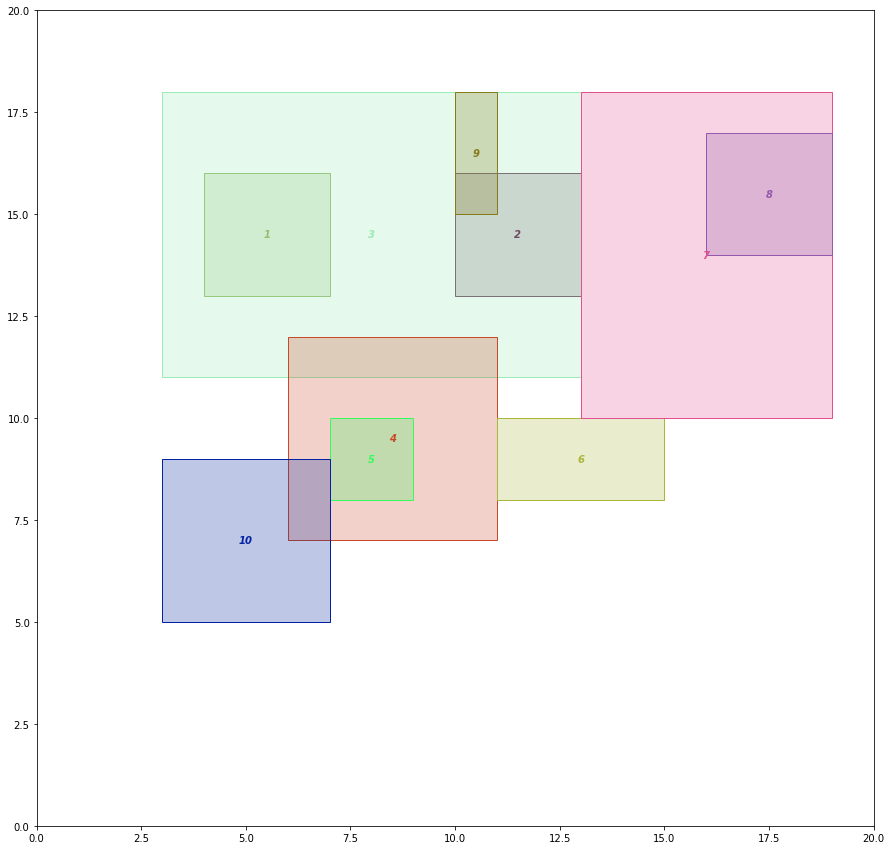

In [ ]:
#reading data from the .txt file
d=read_data('test_data.txt')

#creating an empty list for storing the instatianted rectangles
rect_data=[]
for i in range(len(d)):
  rect_data.append(rect(d[i]))

#to plot rectangles
plot_rect(rect_data)